In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import math
from sklearn.metrics import r2_score


In [2]:
dataset = pd.read_csv('/content/friction_01.csv')

In [3]:
dataset.head()

,Gradation,d,Sf,DEPTH,width,n,SPEC.,uavg,g,lambda
0,1.31,0.000170,0.000100,2.1153,146.603,7.390000e-07,2.65,0.391274,9.81,0.108397
1,1.50,0.000195,0.000045,1.4630,124.968,9.660000e-07,2.65,0.376983,9.81,0.036424
2,1.59,0.000128,0.000142,0.9144,86.258,8.900000e-07,2.65,0.348601,9.81,0.083707
3,1.44,0.000241,0.000086,1.8593,125.578,9.330000e-07,2.65,0.471650,9.81,0.056523
4,1.00,0.000020,0.000088,2.3805,16.026,5.940000e-07,2.65,0.509830,9.81,0.063012


In [4]:
X0=dataset[['Gradation']]
y0=dataset.iloc[:,-1]
X1=dataset[['Gradation','d']]
y1=dataset.iloc[:,-1]
X2=dataset[['Gradation','d','Sf']]
y2=dataset.iloc[:,-1]
X3=dataset[['Gradation','d','Sf','DEPTH']]
y3=dataset.iloc[:,-1]
X4=dataset[['Gradation','d','Sf','DEPTH','width']]
y4=dataset.iloc[:,-1]
X5=dataset[['Gradation','d','Sf','DEPTH','width','n']]
y5=dataset.iloc[:,-1]
X6=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.']]
y6=dataset.iloc[:,-1]
X7=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']]
y7=dataset.iloc[:,-1]
X8=dataset[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']]
y8=dataset.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.2, random_state = 1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.2, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.2, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size = 0.2, random_state = 1)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X0_train[['Gradation']] = sc.fit_transform(X0_train[['Gradation']])
X0_test[['Gradation']] = sc.transform(X0_test[['Gradation']])
X1_train[['Gradation','d']] = sc.fit_transform(X1_train[['Gradation','d']])
X1_test[['Gradation','d']] = sc.transform(X1_test[['Gradation','d']])
X2_train[['Gradation','d','Sf']] = sc.fit_transform(X2_train[['Gradation','d','Sf']])
X2_test[['Gradation','d','Sf']] = sc.transform(X2_test[['Gradation','d','Sf']])
X3_train[['Gradation','d','Sf','DEPTH']] = sc.fit_transform(X3_train[['Gradation','d','Sf','DEPTH']])
X3_test[['Gradation','d','Sf','DEPTH']] = sc.transform(X3_test[['Gradation','d','Sf','DEPTH']])
X4_train[['Gradation','d','Sf','DEPTH','width']] = sc.fit_transform(X4_train[['Gradation','d','Sf','DEPTH','width']])
X4_test[['Gradation','d','Sf','DEPTH','width']] = sc.transform(X4_test[['Gradation','d','Sf','DEPTH','width']])
X5_train[['Gradation','d','Sf','DEPTH','width','n']] = sc.fit_transform(X5_train[['Gradation','d','Sf','DEPTH','width','n']])
X5_test[['Gradation','d','Sf','DEPTH','width','n']] = sc.transform(X5_test[['Gradation','d','Sf','DEPTH','width','n']])
X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.fit_transform(X6_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']] = sc.transform(X6_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.']])
X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.fit_transform(X7_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']] = sc.transform(X7_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg']])
X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.fit_transform(X8_train[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])
X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']] = sc.transform(X8_test[['Gradation','d','Sf','DEPTH','width','n','SPEC.','uavg','g']])

In [7]:
from sklearn.tree import DecisionTreeRegressor 
reg_decisiontree_0 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_1 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_2 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_3 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_4 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_5 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_6 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_7 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_8 = DecisionTreeRegressor(random_state = 0) 
reg_decisiontree_0.fit(X0_train, y0_train)
reg_decisiontree_1.fit(X1_train, y1_train)
reg_decisiontree_2.fit(X2_train, y2_train)
reg_decisiontree_3.fit(X3_train, y3_train)
reg_decisiontree_4.fit(X4_train, y4_train)
reg_decisiontree_5.fit(X5_train, y5_train)
reg_decisiontree_6.fit(X6_train, y6_train)
reg_decisiontree_7.fit(X7_train, y7_train)
reg_decisiontree_8.fit(X8_train, y8_train)
y_pred_decisiontree_0 = reg_decisiontree_0.predict(X0_test)
y_pred_decisiontree_1 = reg_decisiontree_1.predict(X1_test)
y_pred_decisiontree_2 = reg_decisiontree_2.predict(X2_test)
y_pred_decisiontree_3 = reg_decisiontree_3.predict(X3_test)
y_pred_decisiontree_4 = reg_decisiontree_4.predict(X4_test)
y_pred_decisiontree_5 = reg_decisiontree_5.predict(X5_test)
y_pred_decisiontree_6 = reg_decisiontree_6.predict(X6_test)
y_pred_decisiontree_7 = reg_decisiontree_7.predict(X7_test)
y_pred_decisiontree_8 = reg_decisiontree_8.predict(X8_test)

In [8]:
print(type(y0_test.to_numpy()))

<class 'numpy.ndarray'>


In [9]:
predicted_decision = np.concatenate((y0_test.to_numpy().reshape(len(y0_test),1), y_pred_decisiontree_0.reshape(len(y_pred_decisiontree_0),1), y_pred_decisiontree_1.reshape(len(y_pred_decisiontree_1),1), y_pred_decisiontree_2.reshape(len(y_pred_decisiontree_2),1), y_pred_decisiontree_3.reshape(len(y_pred_decisiontree_3),1), y_pred_decisiontree_4.reshape(len(y_pred_decisiontree_4),1), y_pred_decisiontree_5.reshape(len(y_pred_decisiontree_5),1), y_pred_decisiontree_6.reshape(len(y_pred_decisiontree_6),1), y_pred_decisiontree_7.reshape(len(y_pred_decisiontree_7),1), y_pred_decisiontree_8.reshape(len(y_pred_decisiontree_8),1)),1)

In [10]:
r2_score(y0_test, y_pred_decisiontree_0)

0.6385838006788395

In [11]:
r2_score(y1_test, y_pred_decisiontree_1)

0.8616145405311858

In [12]:
r2_score(y2_test, y_pred_decisiontree_2)

0.8571566302942218

In [13]:
r2_score(y3_test, y_pred_decisiontree_3)

0.8966155255473212

In [14]:
r2_score(y4_test, y_pred_decisiontree_4)

0.8835631658976604

In [15]:
r2_score(y5_test, y_pred_decisiontree_5)

0.8833495664243051

In [16]:
r2_score(y6_test, y_pred_decisiontree_6)

0.8757979067214706

In [17]:
r2_score(y7_test, y_pred_decisiontree_7)

0.9244941006598412

In [18]:
r2_score(y8_test, y_pred_decisiontree_8)

0.9176129260740942

In [19]:
pd.DataFrame(predicted_decision).to_csv("decision_result.csv")

In [20]:
print('MAE:', metrics.mean_absolute_error(y8_test, y_pred_decisiontree_8))
print('MSE:', metrics.mean_squared_error(y8_test, y_pred_decisiontree_8))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y8_test, y_pred_decisiontree_8)))
print('nse:', (1-(np.sum(((y_pred_decisiontree_8)-(y8_test))**2)/np.sum(((y8_test)-(np.mean(y8_test)))**2))))

MAE: 0.009501197345454545
MSE: 0.00023786802383807024
RMSE: 0.015422970655424013
nse: 0.9176129260740942


In [21]:
X1=np.arange(0,len(y8_test))

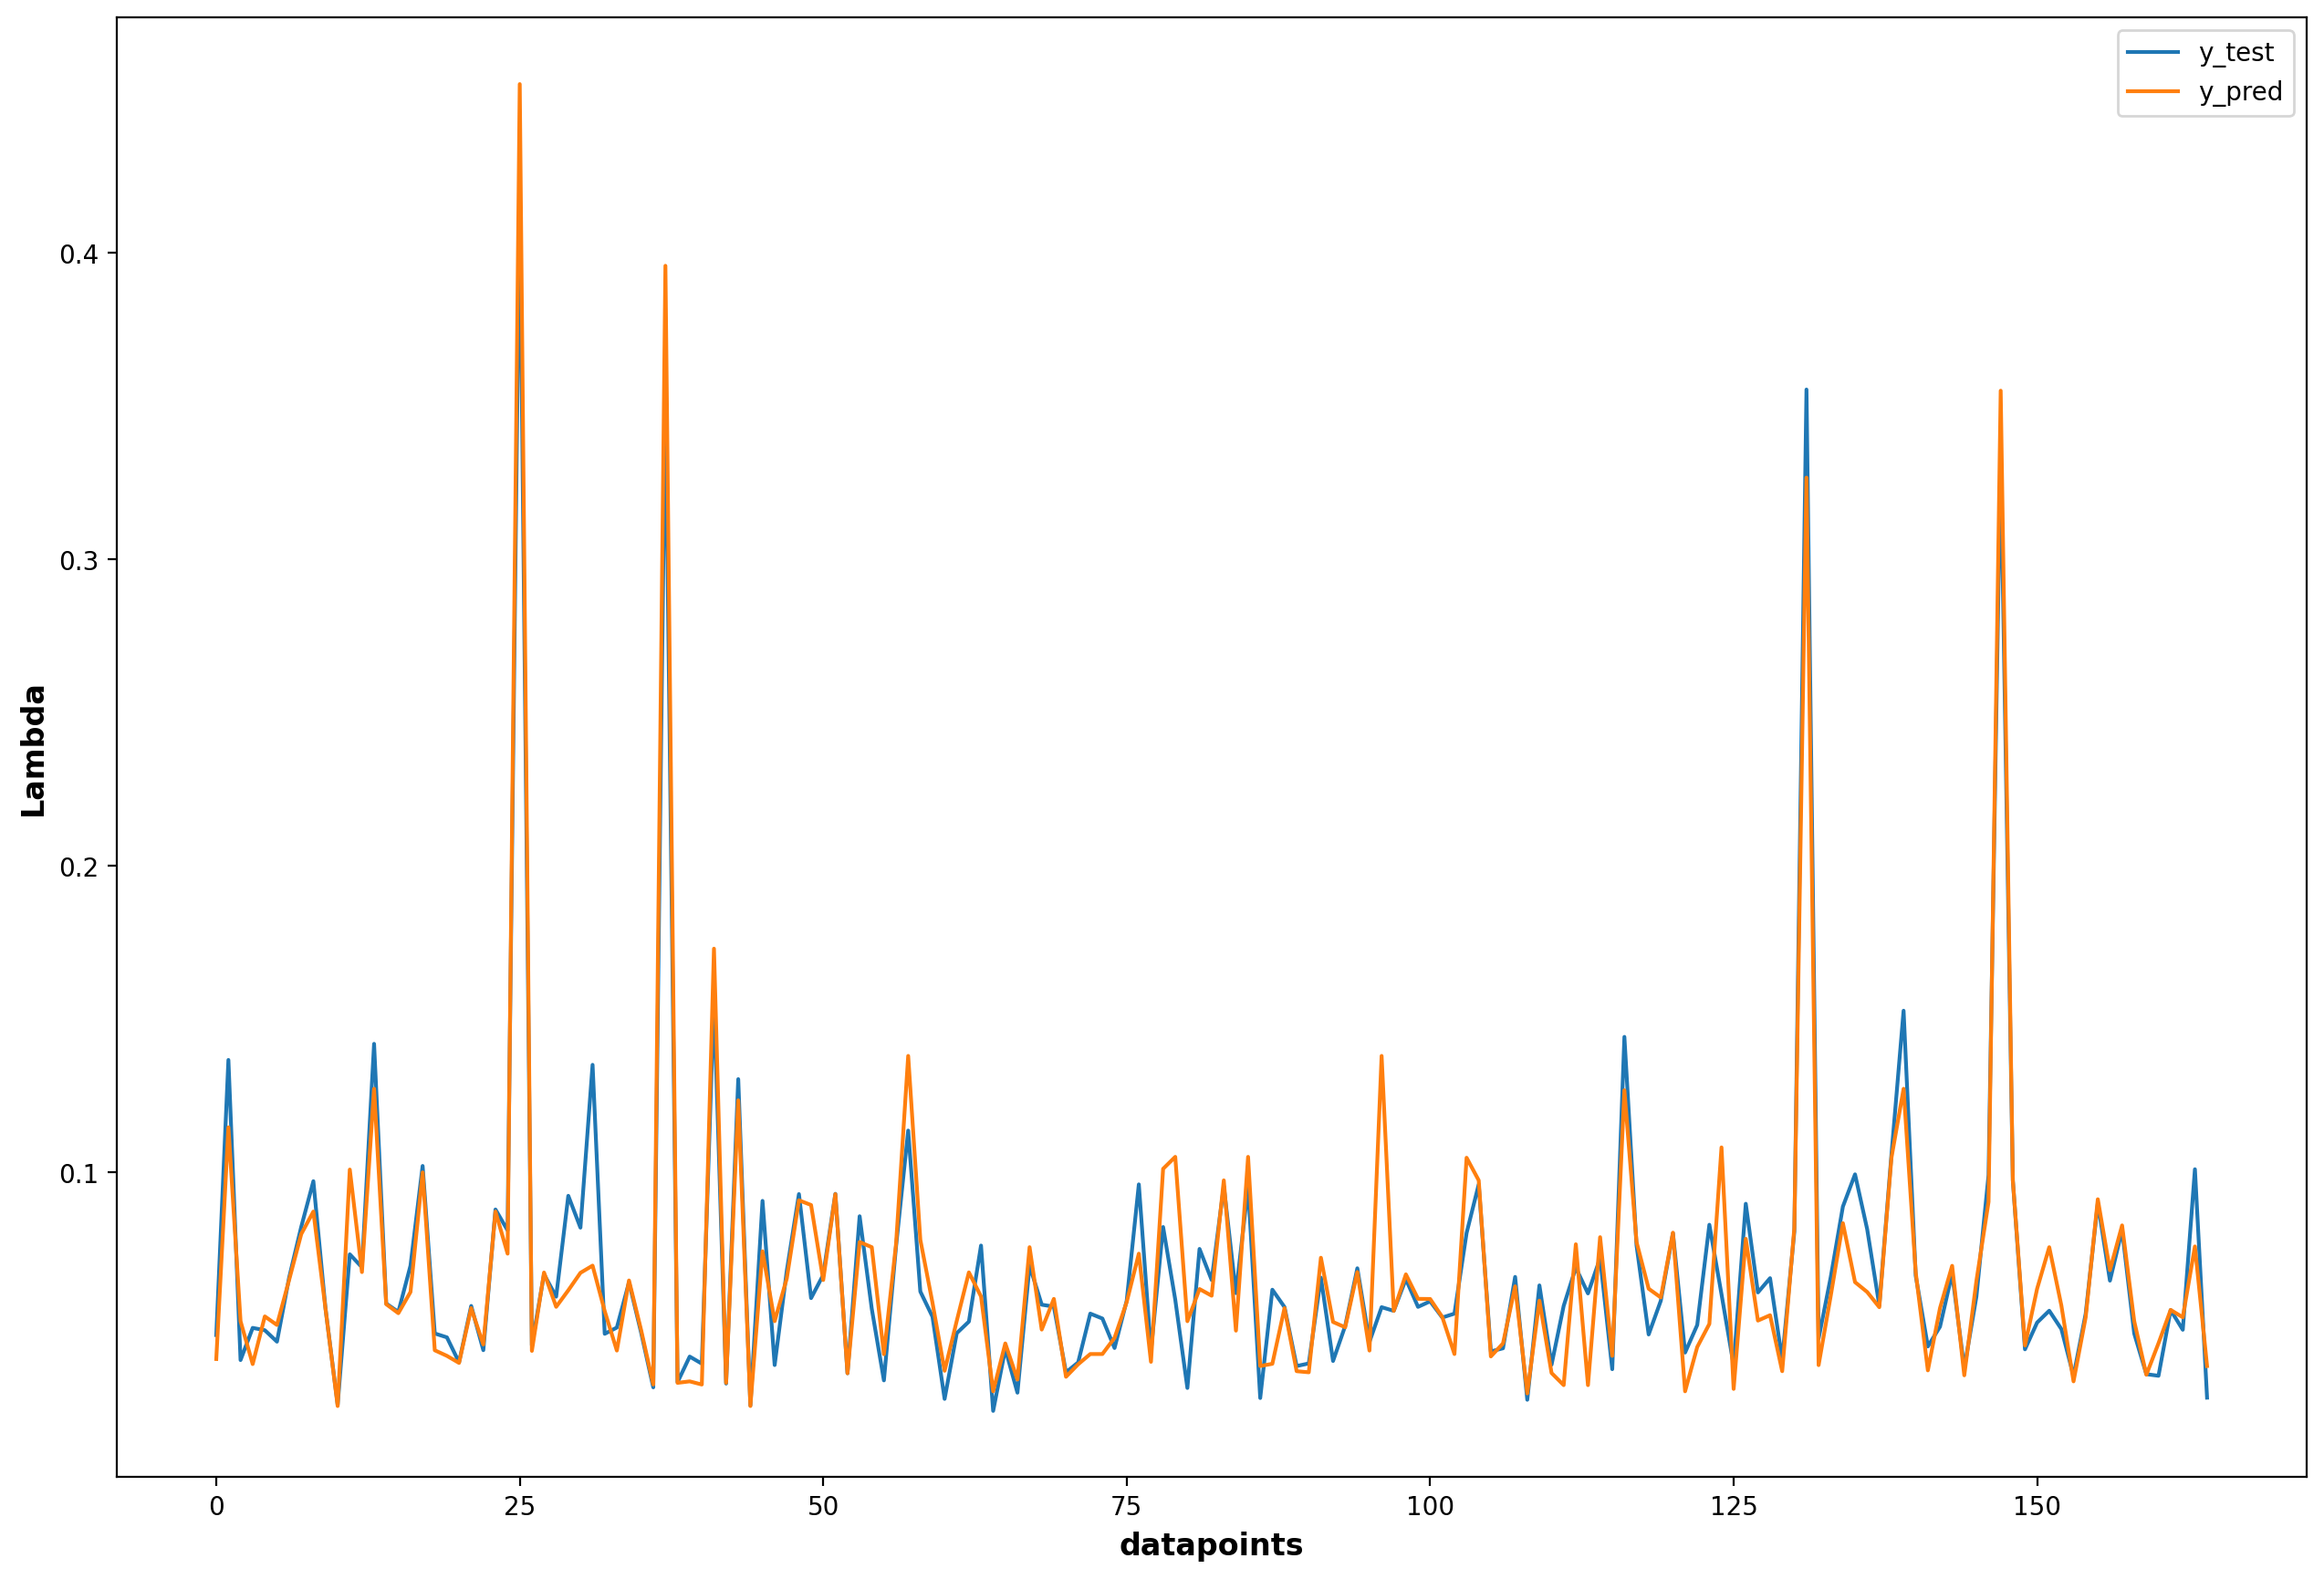

In [22]:
fig = plt.figure(figsize=(12,8), dpi=200)
axes = fig.add_axes([0,0,1,1])
axes.plot(X1, y8_test, label='y_test')
axes.plot(X1, y_pred_decisiontree_8, label='y_pred')
plt.ylabel('Lambda',fontweight='bold', fontsize='12')
plt.xlabel('datapoints',fontweight='bold', fontsize='12')
plt.legend()
plt.show()